In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
plt.style.use('fivethirtyeight')
plt.rcParams["font.family"] = "serif"

In [236]:
def millions(x, pos):
    'The two args are the value and tick position'
    return f'{x * 1e-3: .0f}K'

In [71]:
parent= Path(os.getcwd()).parent
filepath= Path(r'data\clean\clean_data.parquet')
path= parent / filepath

df= pd.read_parquet(path)

df.sample(5)

,id,age,education,marital_status,income,is_parent,kidhome,teenhome,dt_customer,dt_customer_day,...,total_purchase,num_web_visits_month,accepted_cmp1,accepted_cmp2,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp6,num_deals_purchases,complain
745,10470,35,Postgraduate,Together,40662,1,1,0,2013-03-15,15,...,6,4,0,0,0,0,0,0,2,0
1038,9725,48,Postgraduate,Together,28764,1,1,1,2014-06-05,5,...,3,8,0,0,1,0,0,0,1,0
1240,961,42,Graduate,Together,74716,1,0,1,2013-09-12,12,...,15,4,0,0,0,0,0,0,2,0
1040,5740,44,Postgraduate,Alone,25959,1,1,1,2013-02-14,14,...,5,6,0,0,0,0,0,1,2,0
374,6202,54,Graduate,Together,63381,1,0,1,2012-10-05,5,...,22,2,0,0,0,0,0,0,4,0


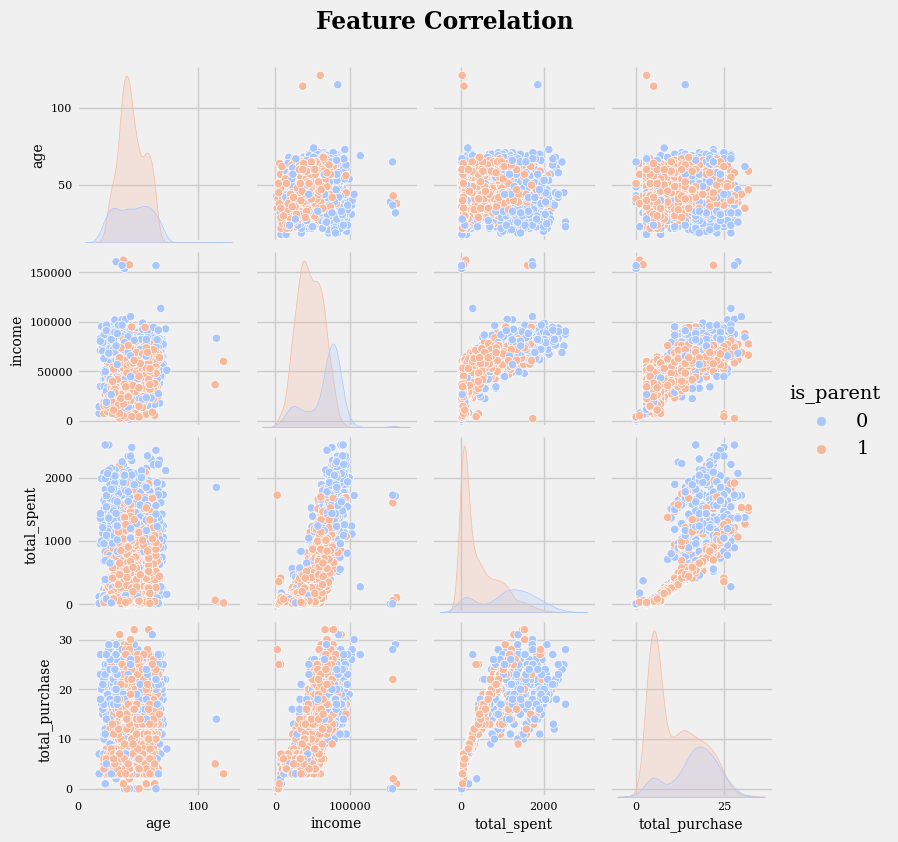

In [82]:
features= ['age', 'income', 'is_parent', 'total_spent', 'total_purchase']

with sns.plotting_context(rc={
    "axes.labelsize":       10,
    'xtick.labelsize':      8,
    'ytick.labelsize':      8,
}):
    sns.pairplot(
        df[features], hue= 'is_parent', palette= 'coolwarm', height= 2, aspect= 1
    )

plt.suptitle('Feature Correlation', fontweight= 'bold', y= 1.05, )
plt.show()

Insights:
- People who are not parents tend to spend more
- The higher the income, the higher the spending and purchase

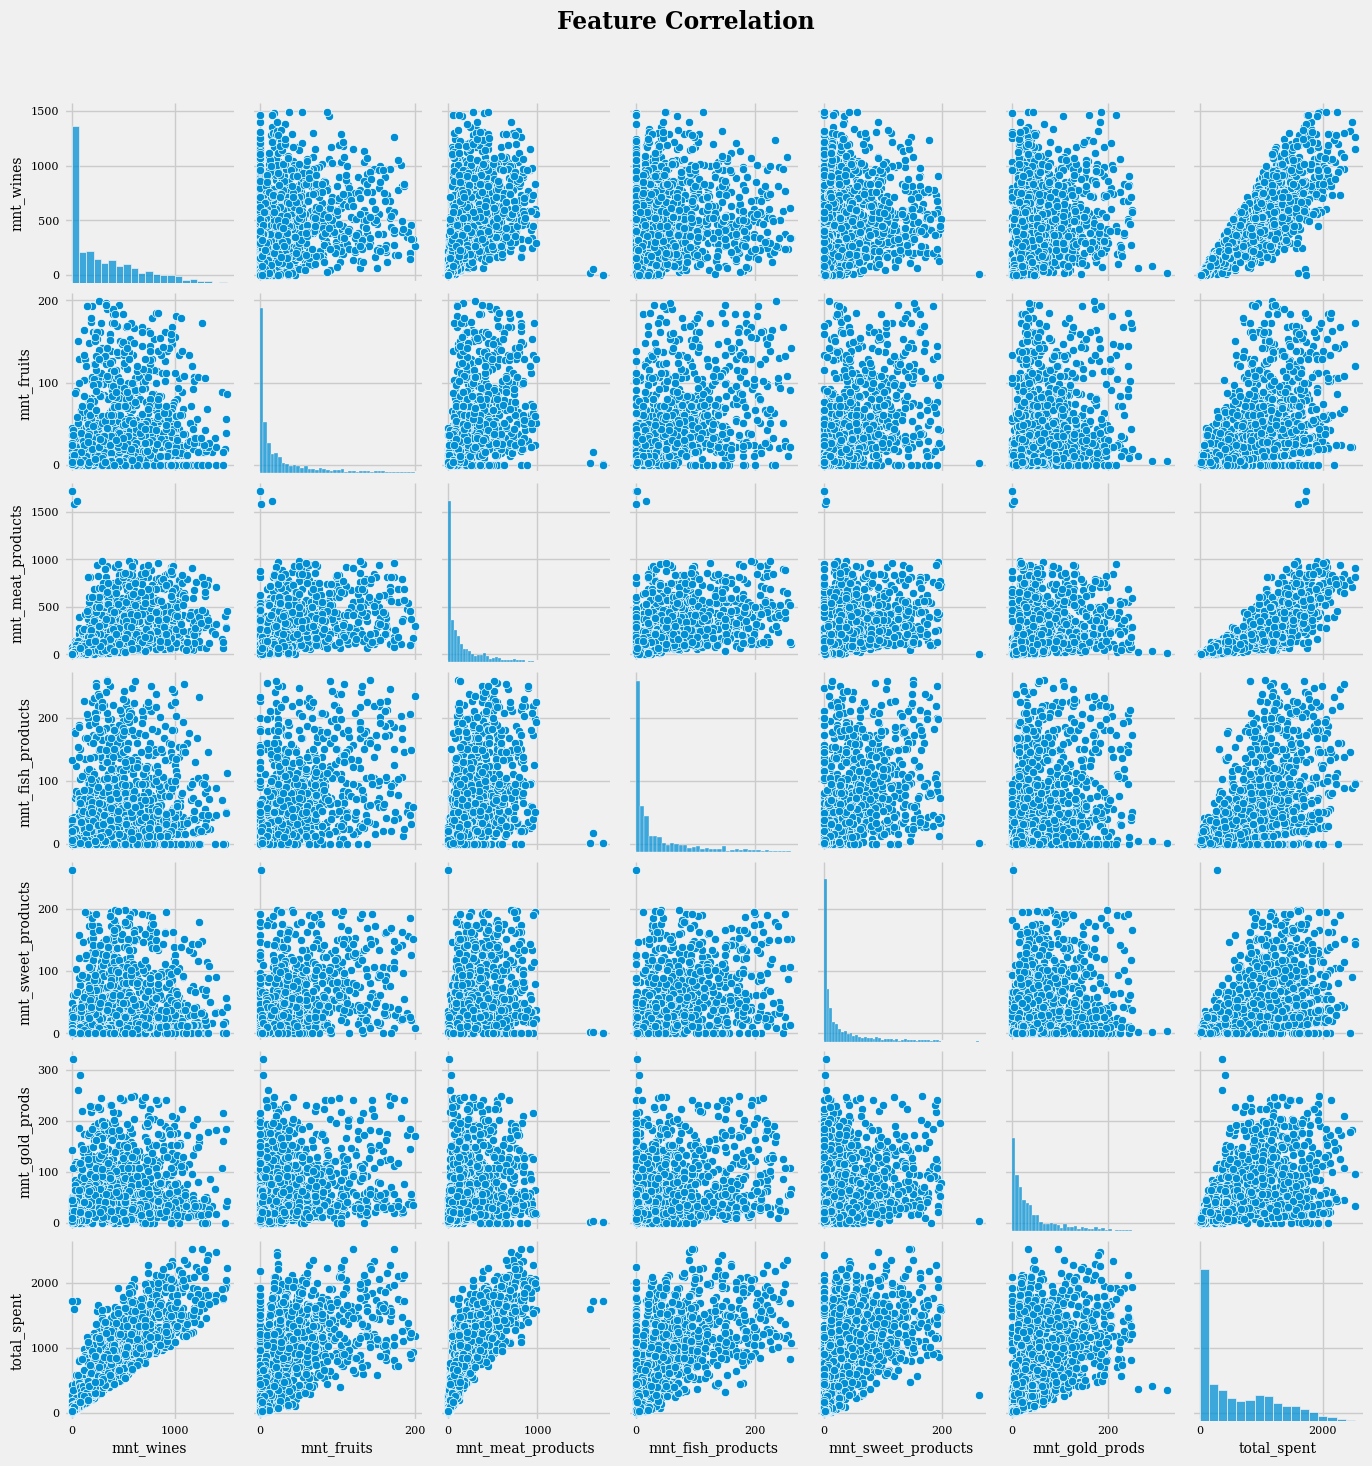

In [83]:
features= ['mnt_wines', 'mnt_fruits',
    'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
    'mnt_gold_prods', 'total_spent']

with sns.plotting_context(rc={
    "axes.labelsize":       10,
    'xtick.labelsize':      8,
    'ytick.labelsize':      8,
}):
    sns.pairplot(
        df[features], height= 2, aspect= 1
    )
plt.suptitle('Feature Correlation', fontweight= 'bold', y= 1.05)
plt.show()

Insights:
- Wines and meat looks to correlate strongly with total spent

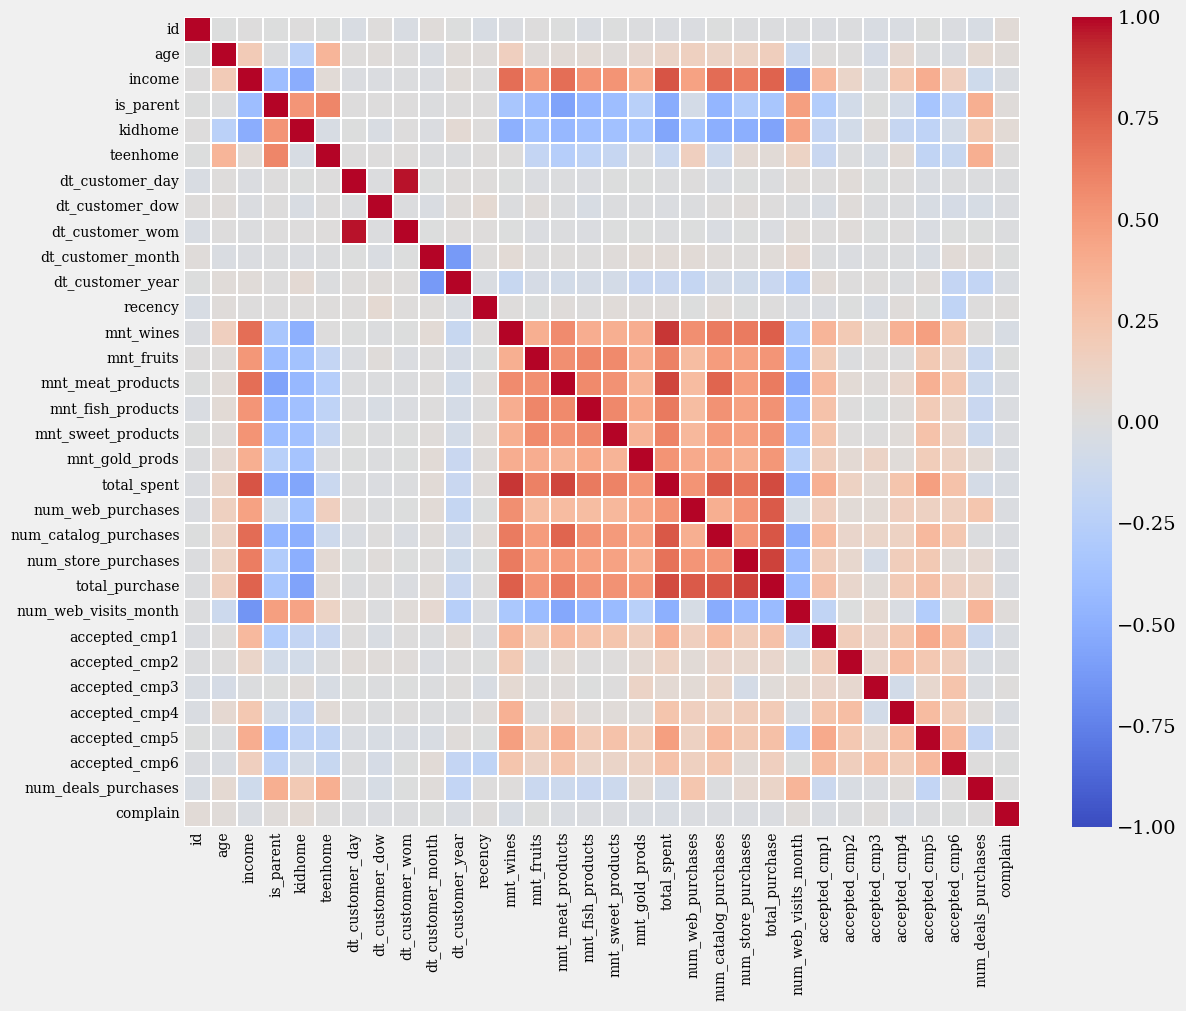

In [89]:
fig, ax= plt.subplots(figsize= (12, 10))

ax= sns.heatmap(
    df.corr(),
    cmap= 'coolwarm', 
    vmin= -1, 
    vmax= 1,
    linewidths= 0.1, 
    linecolor= 'white',
    ax= ax
)

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 10)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 10)

plt.show()

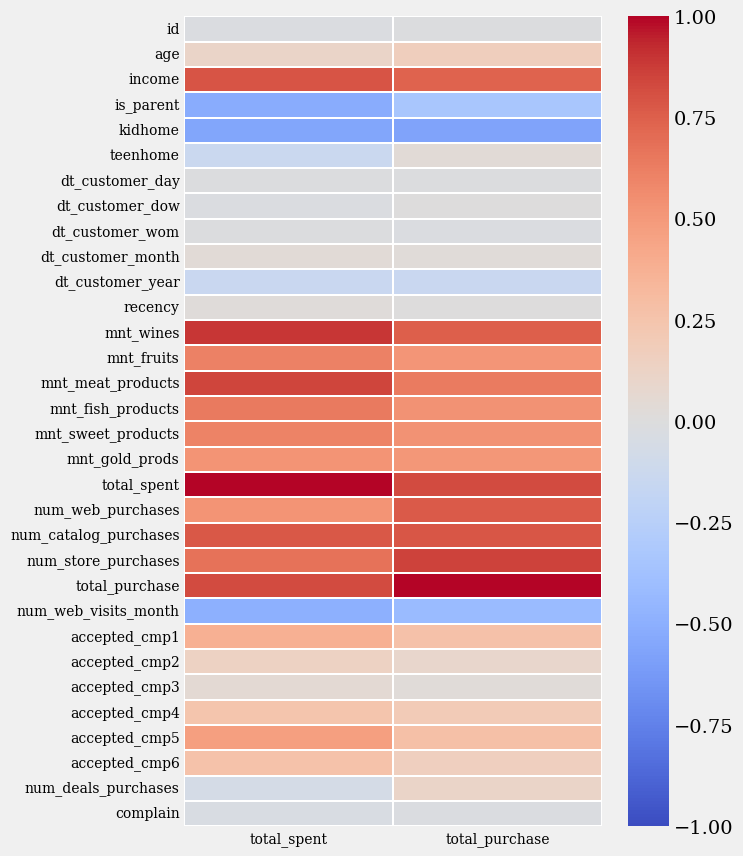

In [90]:
fig, ax= plt.subplots(figsize= (6, 10))

sns.heatmap(
    df.corr()[['total_spent', 'total_purchase']],
    cmap= 'coolwarm', 
    vmin= -1, 
    vmax= 1,
    linewidths= 0.1, 
    linecolor= 'white',
    ax= ax
)

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 10)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 10)
plt.show()

Insights:
- Total spent and total purchase go hand-in-hand

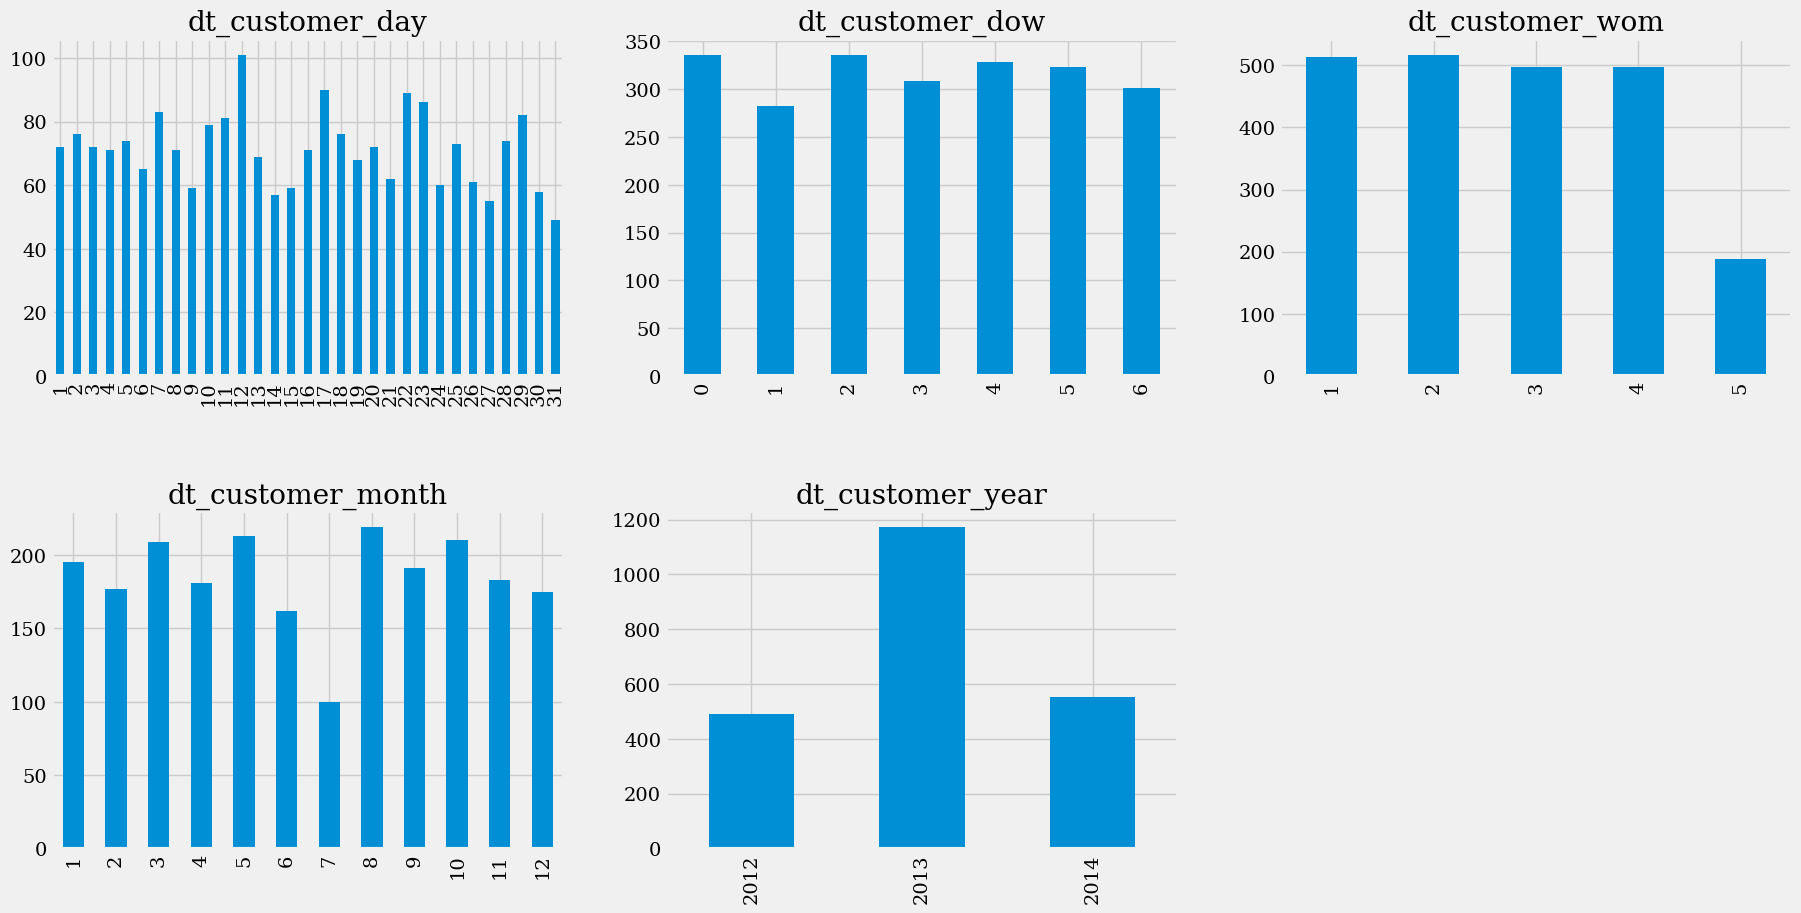

In [92]:
features= df.columns[df.columns.str.contains('dt_customer_')]

fig, axs= plt.subplots(ncols= 3, nrows= 2, figsize= (20, 10))
plt.subplots_adjust(wspace= 0.2, hspace= 0.4)

for col, ax in zip(features, axs.ravel()):
    data= df[col].value_counts().sort_index()
    data.plot(ax= ax, kind= 'bar')
    ax.set_title(col)

axs.flat[-1].set_visible(False)

plt.show()

Insights:
- Customer acquisition is weak on June and July, but strong on August
- 2013 is the year on which most customers join

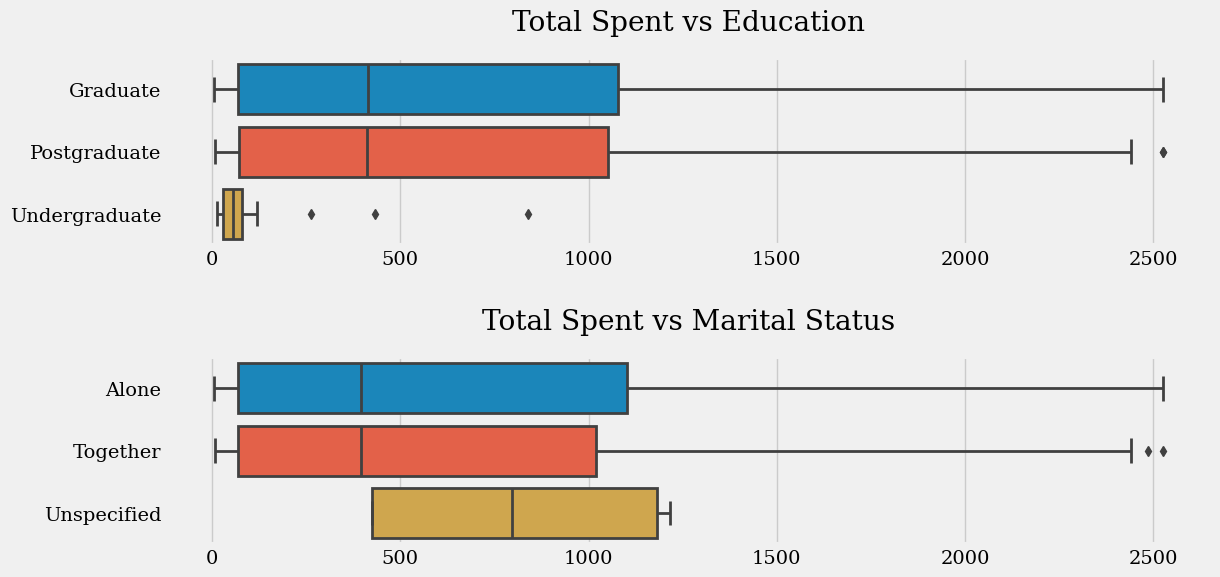

In [143]:
fig, axs= plt.subplots(nrows= 2, figsize= (12, 6))
plt.subplots_adjust(hspace= 0.6)

features= ['education', 'marital_status']

for col, ax in zip(features, axs.ravel()):
    sns.boxplot(
        y= df[col], x= df['total_spent'], linewidth= 2, ax= ax
    )
    ax.set_ylabel('')
    ax.set_xlabel('')

axs[0].set_title('Total Spent vs Education', pad= 20)
axs[1].set_title('Total Spent vs Marital Status', pad= 20)

plt.show()

total_spent AxesSubplot(0.08,0.07;0.395455x0.81)
avg_spent AxesSubplot(0.554545,0.07;0.395455x0.81)


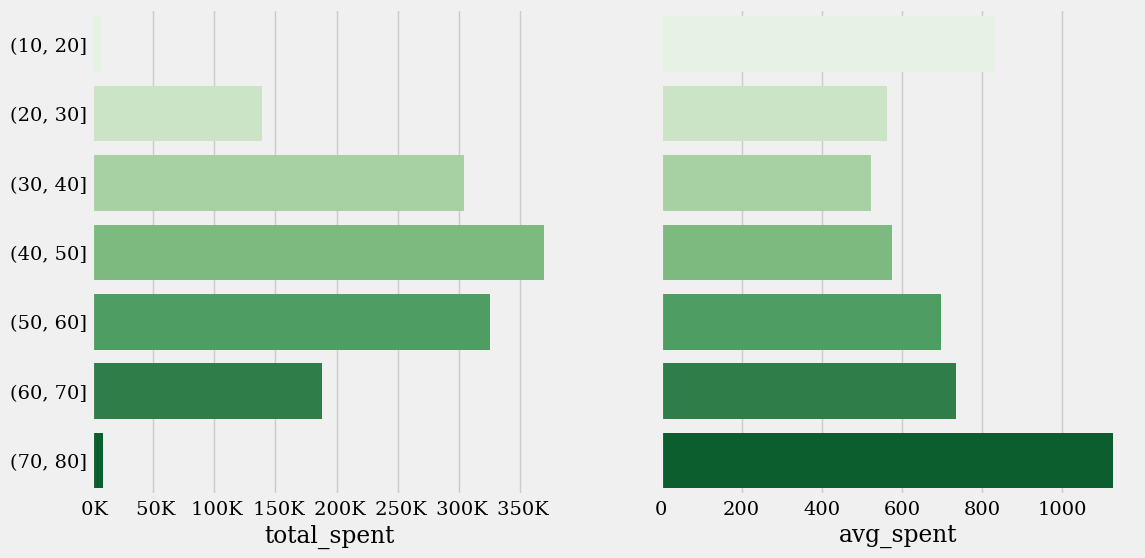

In [237]:
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(millions)

data= (df
    .assign(
        age_group= pd.cut(df['age'], bins= range(10, 90, 10))
    )
    .groupby(['age_group'])
    .agg(
        total_spent= ('total_spent', 'sum'),
        avg_spent= ('total_spent', 'mean')
    )
)

fig, axs= plt.subplots(ncols= 2, sharey= True, figsize= (12, 6))
for col, ax in zip(data.columns, axs.ravel()):
    print(col, ax)
    sns.barplot(y= data.index, x= data[col], ax= ax, palette= 'Greens')
    ax.set_ylabel('')

axs.flat[0].xaxis.set_major_formatter(formatter)